In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

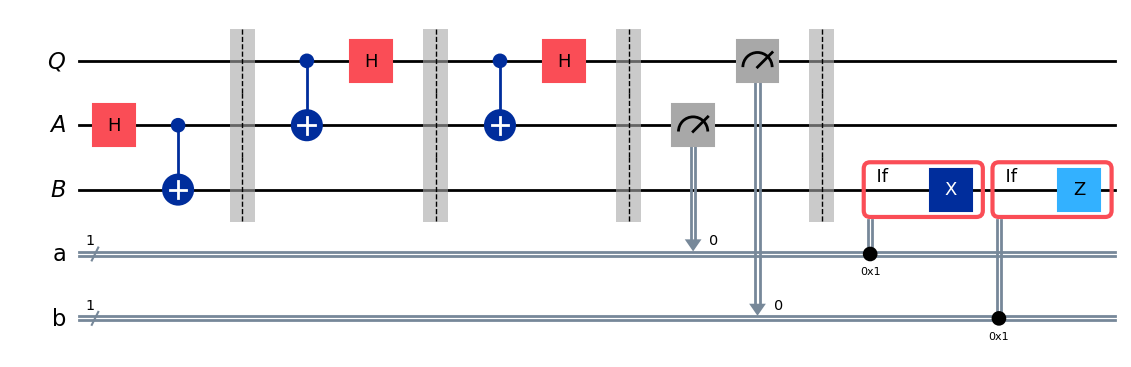

In [2]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output='mpl'))

In [3]:
random_gate = UGate(
    theta = random.random() * 2 * pi,
    phi = random.random() * 2 * pi,
    lam = random.random() * 2 * pi
)

display(random_gate.to_matrix())

array([[ 0.57021687+0.j        , -0.72556355+0.38524052j],
       [ 0.32405798-0.75487691j, -0.04705063-0.5682724j ]])

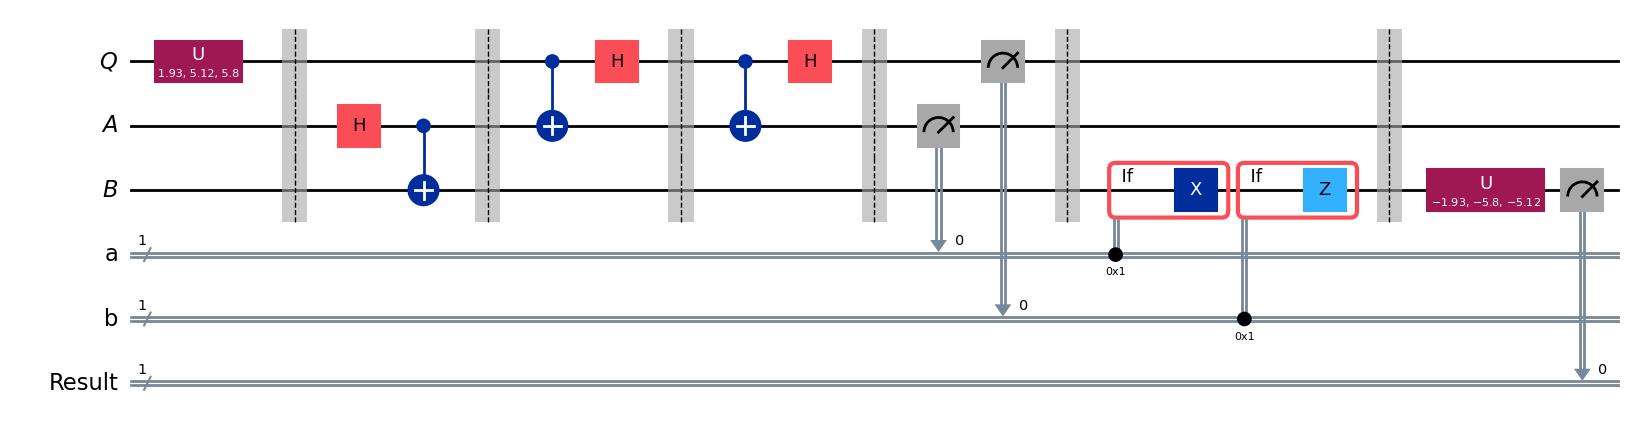

In [4]:
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)
test.append(random_gate, qubit)
test.barrier()
test = test.compose(protocol)
test.barrier()
test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output='mpl'))

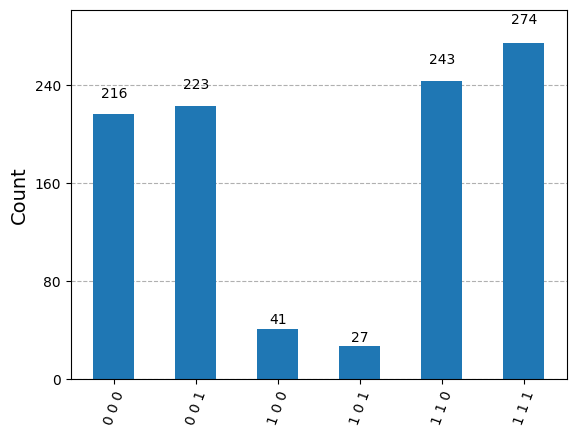

In [5]:
result=AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

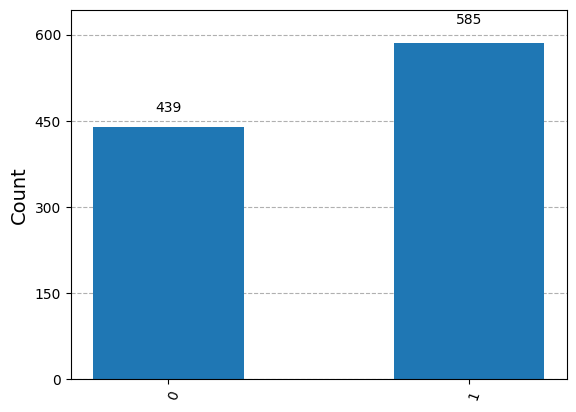

In [6]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))